# Exploratory Data Analysis 

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Australia Data Engineer roles

In [3]:
df_DE_AUS = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Australia')].copy()
df_DE_AUS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1178,Data Engineer,Data Center Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-02-09 13:38:29,False,False,Australia,None,NaN,NaN,Technical Global Solutions,"[react, excel]","{'analyst_tools': ['excel'], 'libraries': ['re..."
1299,Data Engineer,Data Platform Engineer,"Sydney NSW, Australia",via Hatch,Full-time,False,Australia,2023-05-03 13:46:57,False,False,Australia,None,NaN,NaN,WooliesX,None,None
1601,Data Engineer,Data Engineer. Job in Canberra My Valley Jobs ...,"Canberra ACT, Australia",via My Valley Jobs Today,Full-time,False,Australia,2023-02-01 14:05:02,True,False,Australia,None,NaN,NaN,CYOS Solutions,"[python, nosql, mongodb, mongodb, sql, javascr...","{'cloud': ['azure'], 'databases': ['mongodb', ..."
2156,Data Engineer,Principal Databricks Consultant (Data engineer...,"Brisbane QLD, Australia",via LinkedIn,Full-time,False,Australia,2023-04-13 13:15:58,False,False,Australia,None,NaN,NaN,Cuusoo,"[databricks, spark, atlassian, unify]","{'cloud': ['databricks'], 'libraries': ['spark..."
2223,Data Engineer,Head Of Data Engineering,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-13 13:53:40,False,False,Australia,None,NaN,NaN,Maritime And Coastguard Agency,[python],{'programming': ['python']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785304,Data Engineer,"Developer, Data Engineer","Berwick VIC, Australia",via LinkedIn,Full-time,False,Australia,2023-01-06 06:39:24,False,False,Australia,None,NaN,NaN,Federation University Australia,[sql],{'programming': ['sql']}
785322,Data Engineer,Data Engineer,"Brisbane QLD, Australia",via LinkedIn,Full-time,False,Australia,2023-01-17 07:05:54,False,False,Australia,None,NaN,NaN,Randstad Technologies Australia,"[sql, python, r, sql server, azure, databricks...","{'analyst_tools': ['ssis', 'ssrs', 'power bi']..."
785333,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via Trabajo.org,Full-time,False,Australia,2023-07-15 06:17:16,True,False,Australia,None,NaN,NaN,Tata Group,"[sql, python, aws, redshift]","{'cloud': ['aws', 'redshift'], 'programming': ..."
785377,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via LinkedIn,Full-time,False,Australia,2023-01-09 06:15:32,False,False,Australia,None,NaN,NaN,eliiza,"[python, scala, java, nosql, aws, gcp, bigquer...","{'cloud': ['aws', 'gcp', 'bigquery', 'snowflak..."


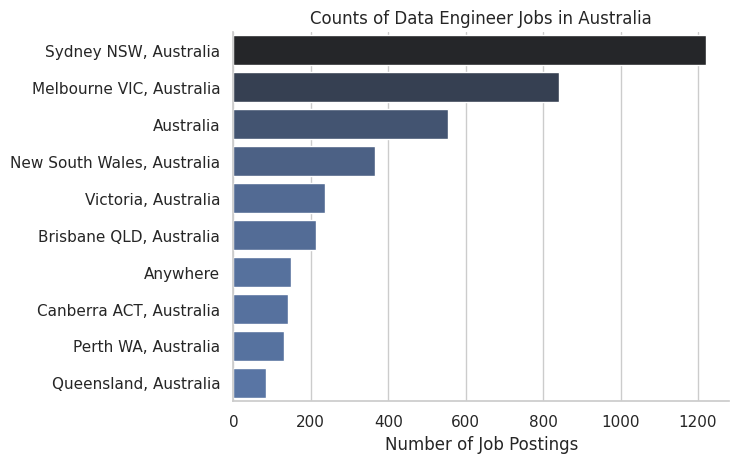

In [4]:
df_plot = df_DE_AUS['job_location'].value_counts().head(10).to_frame() #Get counts of jobs per location for Data Engineers in Australia

sns.set_theme(style="whitegrid") 
sns.barplot(data=df_plot,x='count', y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine() #Removes the top and right spines (border) from plot
plt.title('Counts of Data Engineer Jobs in Australia')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()

In [30]:
df_DE_AUS.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1178,Data Engineer,Data Center Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-02-09 13:38:29,False,False,Australia,None,NaN,NaN,Technical Global Solutions,"[react, excel]","{'analyst_tools': ['excel'], 'libraries': ['re..."
1299,Data Engineer,Data Platform Engineer,"Sydney NSW, Australia",via Hatch,Full-time,False,Australia,2023-05-03 13:46:57,False,False,Australia,None,NaN,NaN,WooliesX,None,None
1601,Data Engineer,Data Engineer. Job in Canberra My Valley Jobs ...,"Canberra ACT, Australia",via My Valley Jobs Today,Full-time,False,Australia,2023-02-01 14:05:02,True,False,Australia,None,NaN,NaN,CYOS Solutions,"[python, nosql, mongodb, mongodb, sql, javascr...","{'cloud': ['azure'], 'databases': ['mongodb', ..."
2156,Data Engineer,Principal Databricks Consultant (Data engineer...,"Brisbane QLD, Australia",via LinkedIn,Full-time,False,Australia,2023-04-13 13:15:58,False,False,Australia,None,NaN,NaN,Cuusoo,"[databricks, spark, atlassian, unify]","{'cloud': ['databricks'], 'libraries': ['spark..."
2223,Data Engineer,Head Of Data Engineering,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-13 13:53:40,False,False,Australia,None,NaN,NaN,Maritime And Coastguard Agency,[python],{'programming': ['python']}


In [32]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

dict_column

{'job_work_from_home': 'Work from Home Offered',
 'job_no_degree_mention': 'Degree Requirement',
 'job_health_insurance': 'Health Insurance Offered'}

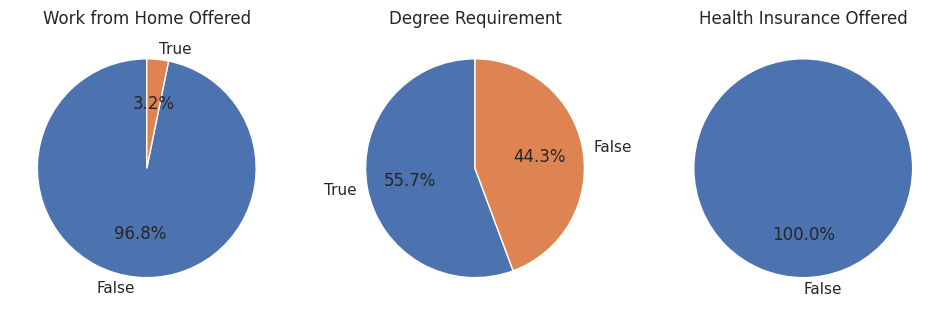

In [34]:
# plotting pie charts for each benefit using for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    count = df_DE_AUS[column].dropna().value_counts()
    labelFlag = count.index.astype(str)  # Dynamically set labels (e.g., 'False', 'True')
    ax[i].pie(count, labels=labelFlag, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

# Counts of Company    

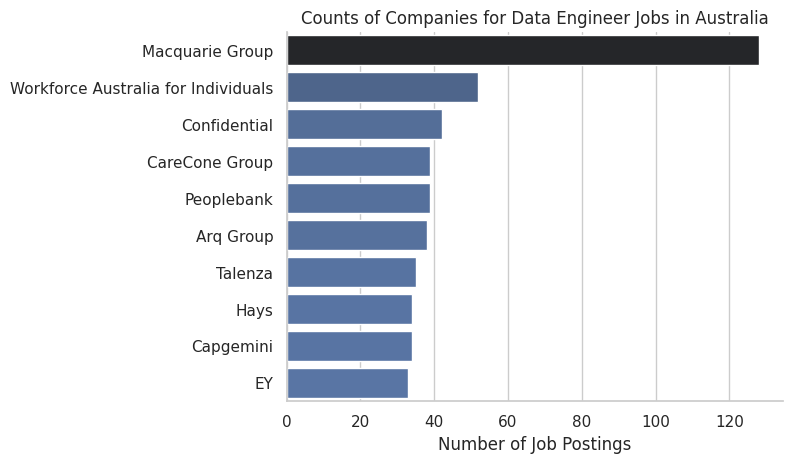

In [ ]:
df_plot = df_DE_AUS['company_name'].value_counts().head(10).to_frame() #Get counts of jobs per company for Data Engineers in Australia

sns.set_theme(style="whitegrid") 
sns.barplot(data=df_plot,x='count', y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine() #Removes the top and right spines (border) from plot
plt.title('Counts of Companies for Data Engineer Jobs in Australia')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()